In [1]:
%matplotlib inline
%load_ext autotime
%load_ext snakeviz
import numpy as np
import pandas as pd
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from datetime import timedelta, datetime
import datetime as dt
from SIR_models import *
import datetime as dt

yellow = (240/255, 203/255, 105/255)
grey = (153/255, 153/255, 153/255)
faded_grey = (153/255, 153/255, 153/255, .25)
red = (220/255, 83/255, 86/255)

# Case Study for Spain, South Korea, US, Italy and Brazil

## Scenario creation

Let's take a look at total confirmed cases in late cycle examples

In [2]:
dic = {}
ct = 'Diamond Princess'
d = SIR(country=ct)
dic[ct] = d.confirmed.max() / d.country_population

ct = 'Korea, South'
d = SIR(country=ct)
dic[ct] = d.confirmed.max() / d.country_population

ct = 'Italy'
d = SIR(country=ct)
dic[ct] = d.confirmed.max() / d.country_population

ct = 'Spain'
d = SIR(country=ct)
dic[ct] = d.confirmed.max() / d.country_population

ct = 'New Zealand'
d = SIR(country=ct)
dic[ct] = d.confirmed.max() / d.country_population

ct = 'Singapore'
d = SIR(country=ct)
dic[ct] = d.confirmed.max() / d.country_population

ct = 'Germany'
d = SIR(country=ct)
dic[ct] = d.confirmed.max() / d.country_population

ct = 'Thailand'
d = SIR(country=ct)
dic[ct] = d.confirmed.max() / d.country_population

ct = 'Japan'
d = SIR(country=ct)
dic[ct] = d.confirmed.max() / d.country_population

ct = 'US'
d = SIR(country=ct)
dic[ct] = d.confirmed.max() / d.country_population

time: 913 ms


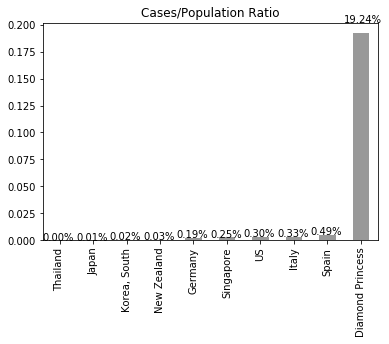

time: 225 ms


In [3]:
df = pd.Series(dic)
df.sort_values(inplace=True)
ax = df.plot.bar(color=grey, title='Cases/Population Ratio')

for i, each in enumerate(df.index):
    #for col in df.columns:
    y = df.loc[each]
    text = "{:.2%}".format(df.loc[each])
    ax.text(i-.5, y*1.05, text)

In [4]:
pd.DataFrame(pd.Series(dic).describe()).T

,count,mean,std,min,25%,50%,75%,max
0,10.0,0.020865,0.060305,0.000042,0.000234,0.00218,0.00322,0.192432


time: 14 ms


The confirmed cases, so far, typically, are ranging from 0.01% to 0.5%, with the exception of the diamond princess.

The most open range would be 0.01%-20%. We would be confortable using a range starting at the minimum value to at least 3-5 times the max value ex-DP

# South Korea

We know that South Korea has extensively tested the population, so that its confirmed cases are more reasonable. Thus we are confortable using the confirmed cases as well to fit the model

S0p: 0.00031042881209934477
gamma_i: 0.25
gamma_h: 0.057142857142856454
omega: 0.2
beta: 0.35576072091823047
delta: 0.4787878787878779
S0: 15807.082196851545
R0:1.4593691719641262
gamma_i: 4.0 days
gamma_h: 17.50000000000021 days
omega: 5.0 days
{'S0p': (0.0001, 0.02), 'gamma_i': (0.07142857142857142, 0.25), 'gamma_h': (0.02197802197802198, 0.05714285714285714), 'omega': (0.047619047619047616, 0.2), 'beta': (0.01, 0.5), 'delta': (0, 0.47878787878787876)}

I Max:
1083.9499877861174
Est:
162.5924981679176
H Max:
114.67019110524818
R Max:
9753.30904237859
F Max:
239.82294801188556
F+R Max:
9993.131990390477


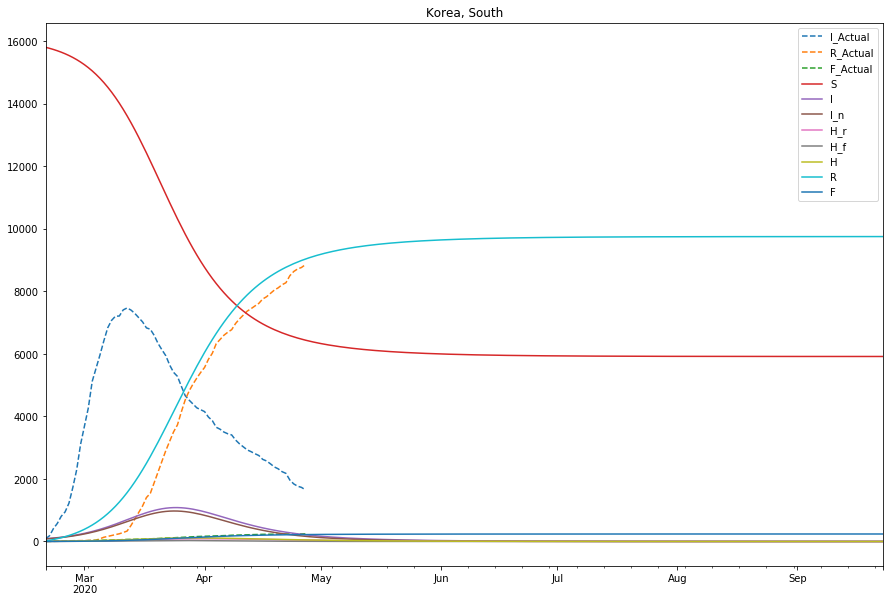

time: 2.96 s


In [227]:
hospRate = 0.05
deltaUpperBound = 79/165

t1 = SIRFH(country = 'Korea, South',
        #quarantineDate = dt.datetime(2020,3,24), #italy lockdown was on the 9th
         hospitalization_rate = hospRate,
         alpha = [.00,0.00,.998],
                   
         # Loose restrictions
         #S0pbounds=(10e6 / 200e6, 10e6 / 200e6),
         #delta_bounds=(0, deltaUpperBound),
         #betaBounds=(0.20, 1.5),
         #gammaBounds=(0.01, .2),
         #gamma_i_bounds=(1/(20), 1/(1)),
         #gamma_h_bounds=(1/(8*7), 1/(2*7)),
         #omega_bounds=(1/(4*7), 1/(3)),
        
         # Tight restrictions
         #S0pbounds=(10e6 / N, 10e6 / N),
         force_parameters = {
             #'S0p': .05,
             #'delta': 79/165,
             #'beta1': 0.31118164052008357,
             #'beta2': .2,
             #'gamma_i': 0.19999999999999982,
             #'gamma_h': 0.023809523809525043,
             #'omega': 0.14199161301361687,
             #'lambda': 0.5,
             
             
         },
                   
         parameter_bounds = {
             'S0p': (.0001, .02),
         #    'delta': (0, deltaUpperBound),
         #    'beta1': (0.20, 1.5),
         #    'beta2': (0.20, 1.5),
             'gamma_i': (1/(14), 1/(4)),
             'gamma_h': (1/(6.5*7), 1/(2.5*7)),
             'omega': (1/(21), 1/(5)),
         #    'lambda': (.5,2)
             
         },
         
         constraints_bounds = {
             'R0': (1,6),
         },
                   
         )

#t1.train_S0()
t1.train()
#t1.train_S0_joint()

#options={'eps': 5e-3, }
#options={'eps': 1e-3, 'ftol': 1e-7}
print(t1.parameter_bounds)

print('\nI Max:')
print(t1.df.I.max())
print('Est:')
print(t1.df.I.max()*.15)
print('H Max:')
print(t1.df['H'].max())
print('R Max:')
print(t1.df['R'].max())
print('F Max:')
print(t1.df['F'].max())
print('F+R Max:')
print(t1.df['F'].max()+t1.df['R'].max())

#t1.outOfSample_forecast(dt.datetime(2020, 4, 1))
t1.main_plot()

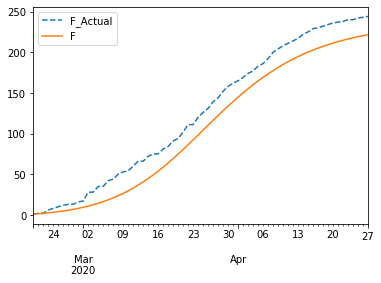

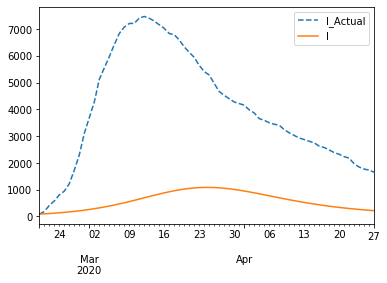

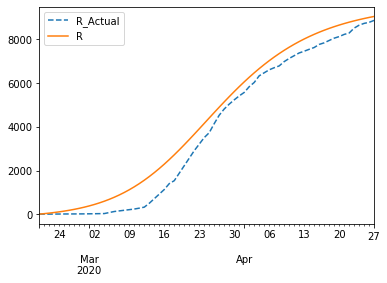

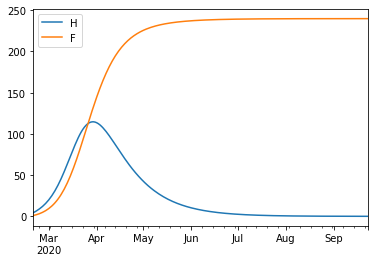

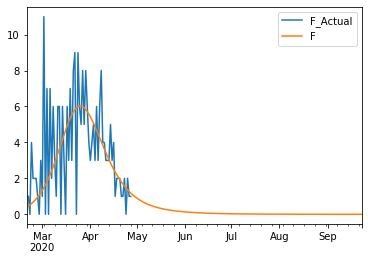

time: 1.29 s


In [228]:
t1.F_fit_plot()
t1.I_fit_plot()
t1.R_fit_plot()
t1.df[['H', 'F']].plot()
t1.df[['F_Actual', 'F']].diff().plot()

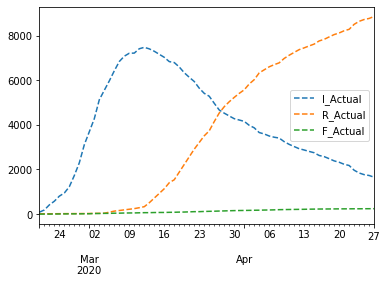

time: 303 ms


In [229]:
t1.actuals_plot()

MSE: 0.8155175395980377


0.8155175395980377

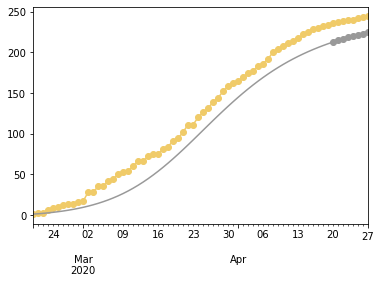

time: 3.34 s


In [230]:
days = 7
t1.outOfSample_forecast(days=days)
#t1.params

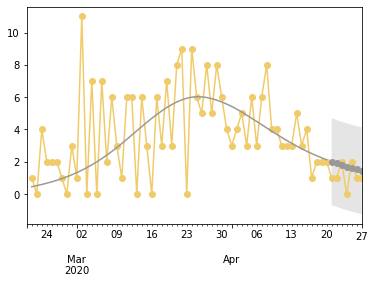

time: 410 ms


In [231]:
t1.outOfSample_plot(days=days, diff=True)

MSE: 4.3646067153692645


4.3646067153692645

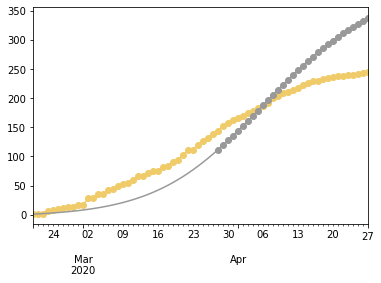

time: 2.33 s


In [232]:
days = 30
t1.outOfSample_forecast(days=days)
#t1.params

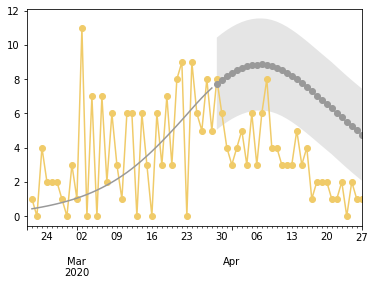

time: 496 ms


In [233]:
t1.outOfSample_plot(days=days, diff=True)

MSE: 4.086144677857985


{'S0p': 0.00010000000000000339,
 'gamma_i': 0.25,
 'gamma_h': 0.05714285714285714,
 'omega': 0.2,
 'beta': 0.47091319195189973,
 'delta': 0.4697628705257756}

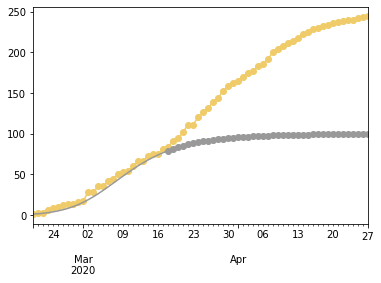

time: 1.27 s


In [234]:
days = 40
t1.outOfSample_forecast(days=days)
t1.params
#t1.parameter_bounds

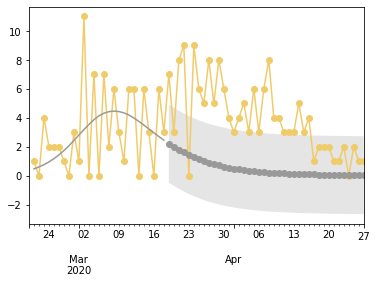

time: 425 ms


In [235]:
t1.outOfSample_plot(days=days, diff=True)

## Italy

S0p: 0.02
gamma_i: 0.07142857142857142
gamma_h: 0.02197802197802198
omega: 0.0537008312521804
delta: 0.47878787878787876
lambda: 3.7394873539423235
beta1: 0.4182940065097954
beta2: 0.2438684969908881
S0: 1209074.02
R0:{'R0_initial': 6.000017123962336, 'R0_final': 3.4980543234391797}
gamma_i: 14.0 days
gamma_h: 45.5 days
omega: 18.62168567380225 days
{'S0p': (0.0001, 0.02), 'gamma_i': (0.07142857142857142, 0.25), 'gamma_h': (0.02197802197802198, 0.05714285714285714), 'omega': (0.047619047619047616, 0.2), 'delta': (0, 0.47878787878787876), 'lambda': (0.25, 4), 'beta1': (0.05, 0.5), 'beta2': (0.05, 0.5)}

I Max:
559898.8974168365
Est:
83984.83461252546
H Max:
35851.95833776831
R Max:
1158529.561276145
F Max:
28428.841488033326
F+R Max:
1186958.4027641783


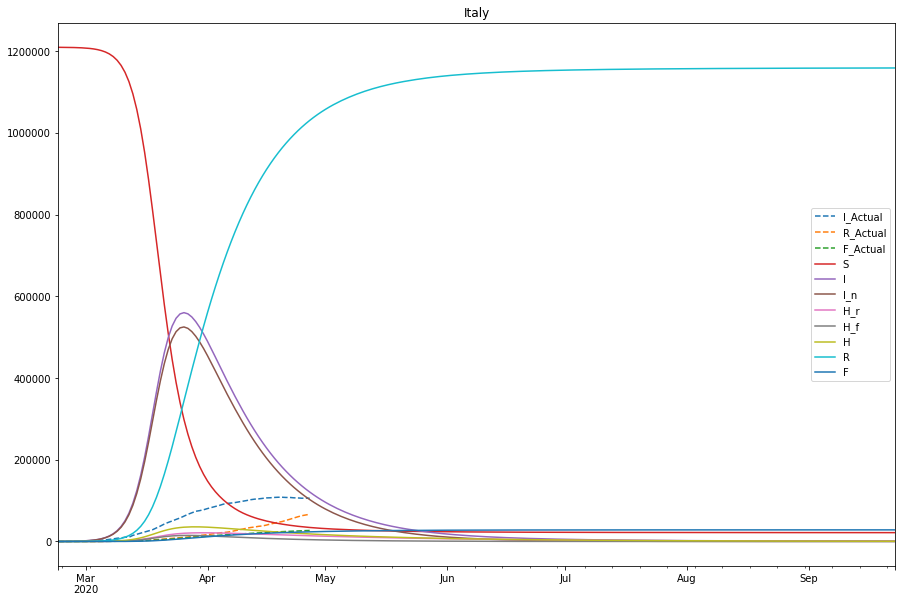

time: 2.35 s


In [236]:
hospRate = 0.05
deltaUpperBound = 79/165

t1 = SIRFH_Sigmoid(country = 'Italy',
         #quarantineDate = dt.datetime(2020,3,24), #italy lockdown was on the 9th
         hospitalization_rate = hospRate,
         alpha = [.00,0.00,1],
                   
         # Loose restrictions
         #S0pbounds=(10e6 / 200e6, 10e6 / 200e6),
         #delta_bounds=(0, deltaUpperBound),
         #betaBounds=(0.20, 1.5),
         #gammaBounds=(0.01, .2),
         #gamma_i_bounds=(1/(20), 1/(1)),
         #gamma_h_bounds=(1/(8*7), 1/(2*7)),
         #omega_bounds=(1/(4*7), 1/(3)),
        
         # Tight restrictions
         #S0pbounds=(10e6 / N, 10e6 / N),
         force_parameters = {
             #'S0p': .05,
             #'delta': 79/165,
             #'beta1': 0.31118164052008357,
             #'beta2': .2,
             #'gamma_i': 0.19999999999999982,
             #'gamma_h': 0.023809523809525043,
             #'omega': 0.14199161301361687,
             #'lambda': 0.5,
             
             
         },
                   
         parameter_bounds = {
             'S0p': (.0001, .02),
         #    'delta': (0, deltaUpperBound),
         #    'beta1': (0.20, 1.5),
         #    'beta2': (0.20, 1.5),
             'gamma_i': (1/(14), 1/(4)),
             'gamma_h': (1/(6.5*7), 1/(2.5*7)),
             'omega': (1/(21), 1/(5)),
         #    'lambda': (.5,2)
             
         },
         
         constraints_bounds = {
             'R0': (1,6),
         },
                   
         )

#t1.train_S0()
t1.train()
#t1.train_S0_joint()

#options={'eps': 5e-3, }
#options={'eps': 1e-3, 'ftol': 1e-7}
print(t1.parameter_bounds)

print('\nI Max:')
print(t1.df.I.max())
print('Est:')
print(t1.df.I.max()*.15)
print('H Max:')
print(t1.df['H'].max())
print('R Max:')
print(t1.df['R'].max())
print('F Max:')
print(t1.df['F'].max())
print('F+R Max:')
print(t1.df['F'].max()+t1.df['R'].max())

#t1.outOfSample_forecast(dt.datetime(2020, 4, 1))
t1.main_plot()

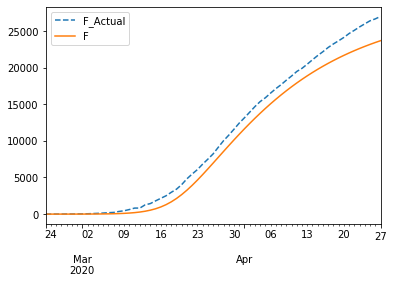

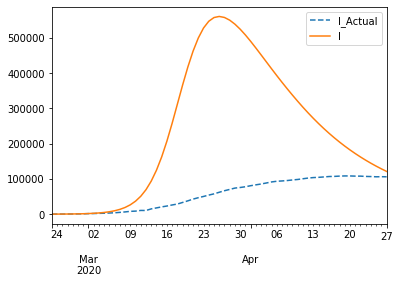

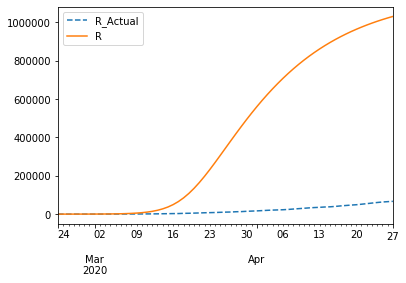

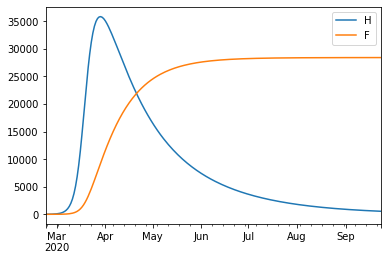

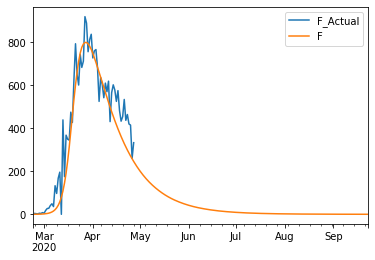

time: 1.42 s


In [237]:
t1.F_fit_plot()
t1.I_fit_plot()
t1.R_fit_plot()
t1.df[['H', 'F']].plot()
t1.df[['F_Actual', 'F']].diff().plot()

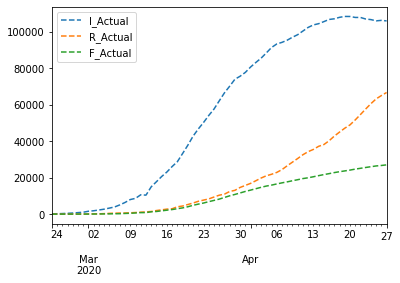

time: 289 ms


In [238]:
t1.actuals_plot()

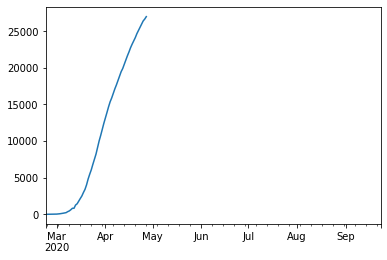

time: 218 ms


In [239]:
t1.df.F_Actual.plot()

MSE: 135.17760467616407


135.17760467616407

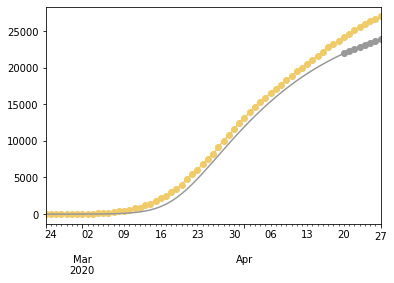

time: 2.78 s


In [240]:
days = 7
t1.outOfSample_forecast(days=days)
#t1.params

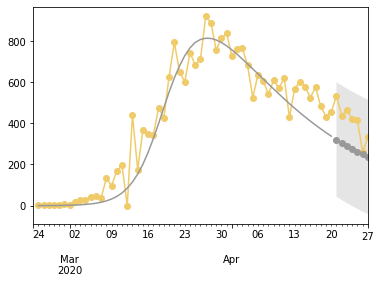

time: 383 ms


In [241]:
t1.outOfSample_plot(days=days, diff=True)

MSE: 217.2679204600631


217.2679204600631

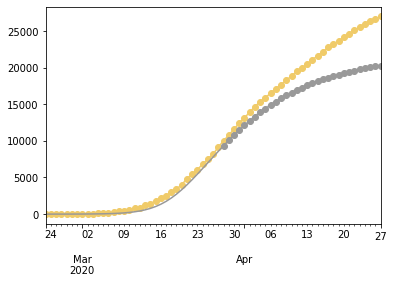

time: 2.95 s


In [242]:
days = 30
t1.outOfSample_forecast(days=days)
#t1.params

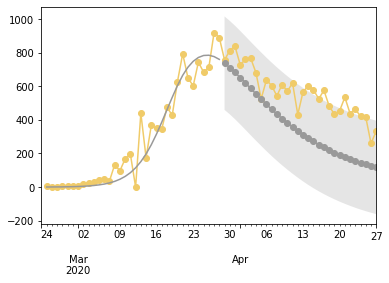

time: 420 ms


In [243]:
t1.outOfSample_plot(days=days, diff=True)

MSE: 501.1348160674342


{'S0p': 0.006230791338233763,
 'gamma_i': 0.15267668895197753,
 'gamma_h': 0.05714285714284608,
 'omega': 0.19999999999999155,
 'delta': 0.47878787878784657,
 'lambda': 3.999999999999867,
 'beta1': 0.5,
 'beta2': 0.15132000125581552}

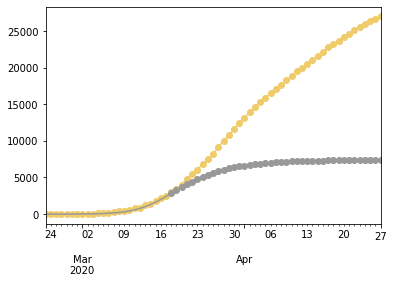

time: 2.13 s


In [244]:
days = 40
t1.outOfSample_forecast(days=days)
t1.params

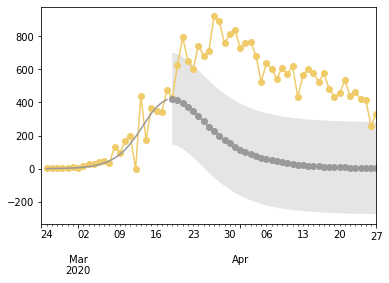

time: 366 ms


In [245]:
t1.outOfSample_plot(days=days, diff=True)

## Spain

S0p: 0.02
gamma_i: 0.07142857154855459
gamma_h: 0.021978021982860575
omega: 0.1999999999898145
delta: 0.478787878756105
lambda: 0.2500000000016578
beta1: 0.43930811486296917
beta2: 0.26149428111399325
S0: 934970.7266666667
R0:{'R0_initial': 6.00001940614329, 'R0_final': 3.571458637336686}
gamma_i: 13.9999999764833 days
gamma_h: 45.499999989982896 days
omega: 5.000000000254638 days
{'S0p': (0.0001, 0.02), 'gamma_i': (0.07142857142857142, 0.25), 'gamma_h': (0.02197802197802198, 0.05714285714285714), 'omega': (0.047619047619047616, 0.2), 'delta': (0, 0.47878787878787876), 'lambda': (0.25, 4), 'beta1': (0.05, 0.5), 'beta2': (0.05, 0.5)}

I Max:
361680.5772480984
Est:
54252.086587214755
H Max:
18441.572183051336
R Max:
891240.3734623077
F Max:
21873.41845782954
F+R Max:
913113.7919201372


C:\Users\U003477\Documents\Repos\Covid Data\SIR_models.py:1129: RuntimeWarning: overflow encountered in exp
  return (self.model_params['beta1'] -


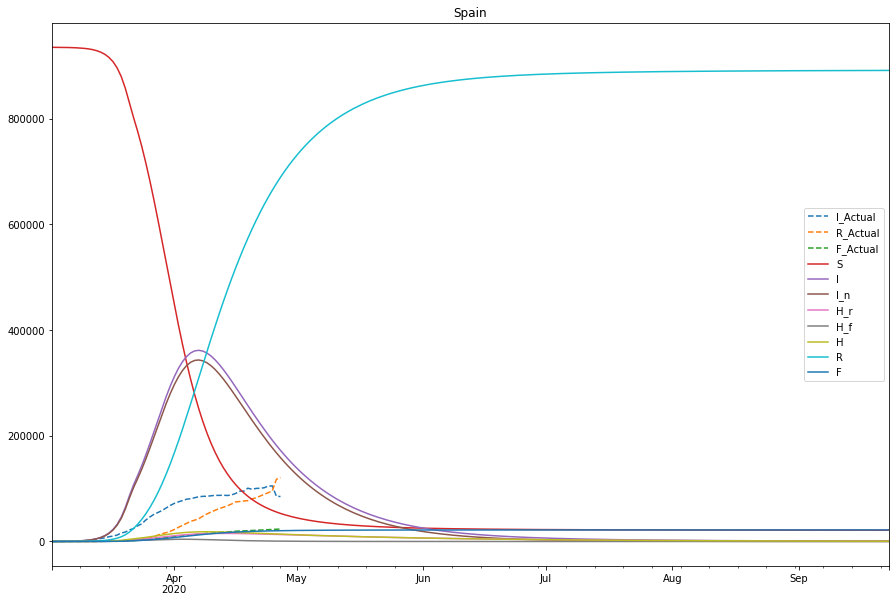

time: 2.64 s


In [256]:
hospRate = 0.05
deltaUpperBound = 79/165

t1 = SIRFH_Sigmoid(country = 'Spain',
         #quarantineDate = dt.datetime(2020,3,24), #italy lockdown was on the 9th
         hospitalization_rate = hospRate,
         alpha = [.000,.000,.9998],
                   
         # Loose restrictions
         #S0pbounds=(10e6 / 200e6, 10e6 / 200e6),
         #delta_bounds=(0, deltaUpperBound),
         #betaBounds=(0.20, 1.5),
         #gammaBounds=(0.01, .2),
         #gamma_i_bounds=(1/(20), 1/(1)),
         #gamma_h_bounds=(1/(8*7), 1/(2*7)),
         #omega_bounds=(1/(4*7), 1/(3)),
        
         # Tight restrictions
         #S0pbounds=(10e6 / N, 10e6 / N),
         force_parameters = {
             #'S0p': .02,
             #'delta': 79/165,
             #'beta1': 0.31118164052008357,
             #'beta2': .2,
             #'gamma_i': 0.19999999999999982,
             #'gamma_h': 0.023809523809525043,
             #'omega': 0.14199161301361687,
             #'lambda': 0.5,
             
             
         },
                   
         parameter_bounds = {
             'S0p': (.0001, .02),
         #    'delta': (0, deltaUpperBound),
         #    'beta1': (0.20, 1.5),
         #    'beta2': (0.20, 1.5),
             'gamma_i': (1/(14), 1/(4)),
             'gamma_h': (1/(6.5*7), 1/(2.5*7)),
             'omega': (1/(21), 1/(5)),
         #    'lambda': (.5,2)
             
         },
         
         constraints_bounds = {
             'R0': (1,6),
         },
                   
         )

#t1.train_S0()
t1.train()
#t1.train_S0_joint()

#options={'eps': 5e-3, }
#options={'eps': 1e-3, 'ftol': 1e-7}
print(t1.parameter_bounds)

print('\nI Max:')
print(t1.df.I.max())
print('Est:')
print(t1.df.I.max()*.15)
print('H Max:')
print(t1.df['H'].max())
print('R Max:')
print(t1.df['R'].max())
print('F Max:')
print(t1.df['F'].max())
print('F+R Max:')
print(t1.df['F'].max()+t1.df['R'].max())

#t1.outOfSample_forecast(dt.datetime(2020, 4, 1))
t1.main_plot()

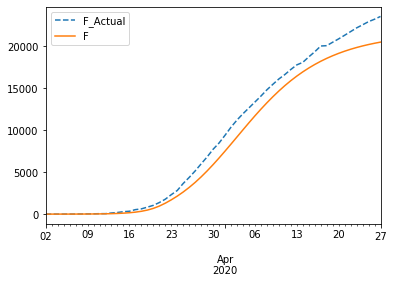

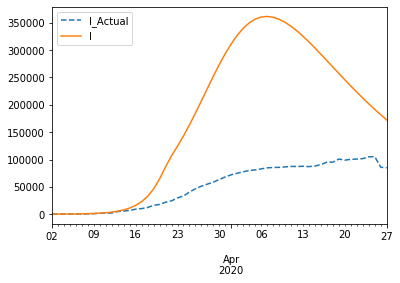

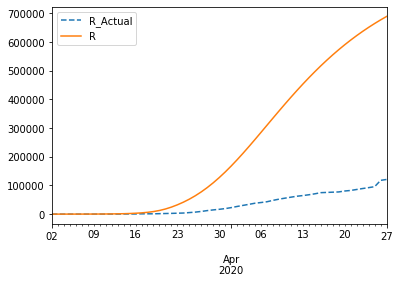

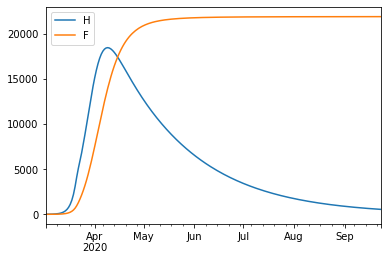

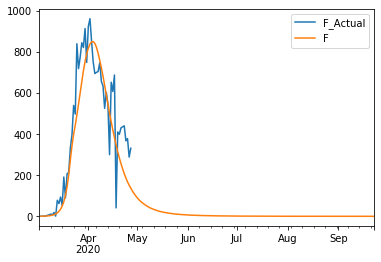

time: 1.12 s


In [257]:
t1.F_fit_plot()
t1.I_fit_plot()
t1.R_fit_plot()
t1.df[['H', 'F']].plot()
t1.df[['F_Actual', 'F']].diff().plot()

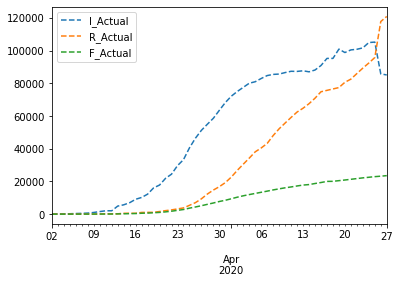

time: 255 ms


In [258]:
t1.actuals_plot()

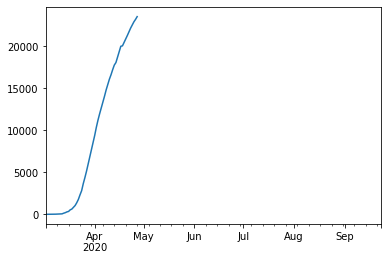

time: 183 ms


In [259]:
t1.df.F_Actual.plot()

C:\Users\U003477\Documents\Repos\Covid Data\SIR_models.py:1129: RuntimeWarning: overflow encountered in exp
  return (self.model_params['beta1'] -


MSE: 198.41898733234032


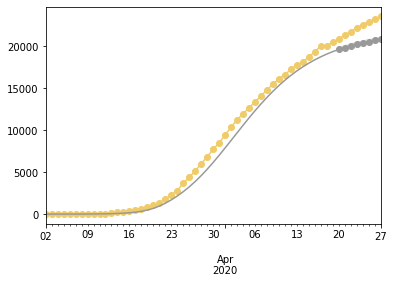

time: 2.14 s


In [260]:
days = 7
t1.outOfSample_forecast(days=days)
seven = t1.forecast.copy()
#t1.params

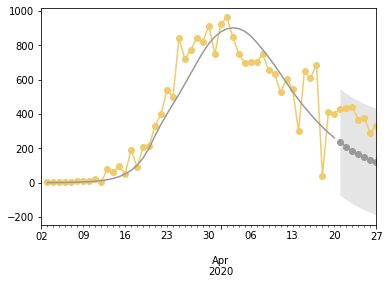

time: 294 ms


In [261]:
t1.outOfSample_plot(days=days, diff=True)

MSE: 228.65314589043348


C:\Users\U003477\Documents\Repos\Covid Data\SIR_models.py:1129: RuntimeWarning: overflow encountered in exp
  return (self.model_params['beta1'] -


228.65314589043348

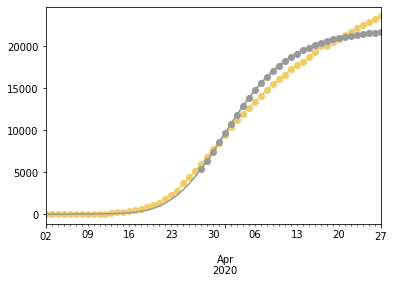

time: 1.15 s


In [262]:
days = 30
t1.outOfSample_forecast(days=days)
#t1.params

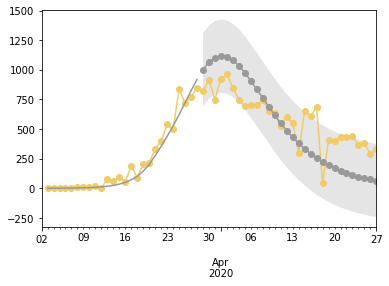

time: 315 ms


In [263]:
t1.outOfSample_plot(days=days, diff=True)

MSE: 304.8310643067023


{'S0p': 0.02,
 'gamma_i': 0.07142857150671239,
 'gamma_h': 0.021978021978047834,
 'omega': 0.19999999999998017,
 'delta': 0.4787878787878461,
 'lambda': 3.1312577577354554,
 'beta1': 0.43930669542624823,
 'beta2': 0.4393066912222059}

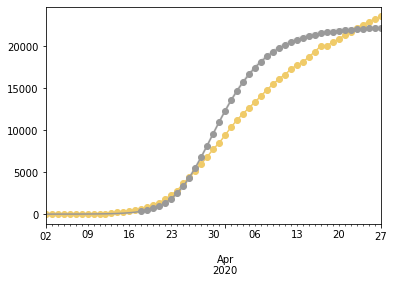

time: 3.27 s


In [264]:
days = 40
t1.outOfSample_forecast(days=days)
forty = t1.forecast.copy()
t1.params

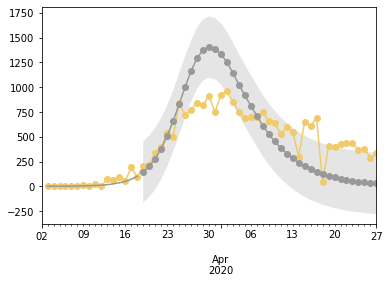

time: 445 ms


In [265]:
t1.outOfSample_plot(days=days, diff=True)

## United States

S0p: 0.015697763024672382
gamma_i: 0.07471806299591265
gamma_h: 0.03159857149174956
omega: 0.11025493020768114
delta: 0.33752541697495253
lambda: 2.7732680640396015
beta1: 0.43323234430082935
beta2: 0.2016597625901414
S0: 5195877.994118155
R0:{'R0_initial': 5.863245246869627, 'R0_final': 2.729206764097185}
gamma_i: 13.383644595480261 days
gamma_h: 31.647000253195046 days
omega: 9.069889193311855 days
{'S0p': (0.0001, 0.02), 'gamma_i': (0.07142857142857142, 0.25), 'gamma_h': (0.02197802197802198, 0.05714285714285714), 'omega': (0.047619047619047616, 0.2), 'delta': (0, 0.47878787878787876), 'lambda': (0.25, 4), 'beta1': (0.05, 0.5), 'beta2': (0.05, 0.5)}

I Max:
1563208.9773138808
Est:
234481.34659708213
H Max:
98616.26794560303
R Max:
4766682.033522353
F Max:
81857.81432302644
F+R Max:
4848539.847845379


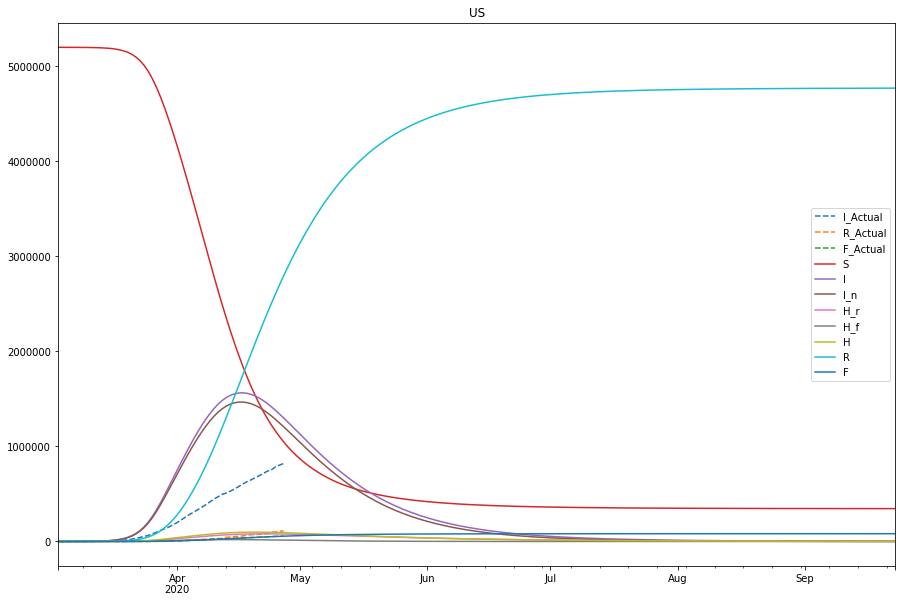

time: 3.75 s


In [266]:
hospRate = 0.05
deltaUpperBound = 79/165

t1 = SIRFH_Sigmoid(country = 'US',
         #quarantineDate = dt.datetime(2020,3,24), #italy lockdown was on the 9th
         hospitalization_rate = hospRate,
         alpha = [.000,.000,.9998],
                   
         # Loose restrictions
         #S0pbounds=(10e6 / 200e6, 10e6 / 200e6),
         #delta_bounds=(0, deltaUpperBound),
         #betaBounds=(0.20, 1.5),
         #gammaBounds=(0.01, .2),
         #gamma_i_bounds=(1/(20), 1/(1)),
         #gamma_h_bounds=(1/(8*7), 1/(2*7)),
         #omega_bounds=(1/(4*7), 1/(3)),
        
         # Tight restrictions
         #S0pbounds=(10e6 / N, 10e6 / N),
         force_parameters = {
             #'S0p': .02,
             #'delta': 79/165,
             #'beta1': 0.31118164052008357,
             #'beta2': .2,
             #'gamma_i': 0.19999999999999982,
             #'gamma_h': 0.023809523809525043,
             #'omega': 0.14199161301361687,
             #'lambda': 0.5,
             
             
         },
                   
         parameter_bounds = {
             'S0p': (.0001, .02),
         #    'delta': (0, deltaUpperBound),
         #    'beta1': (0.20, 1.5),
         #    'beta2': (0.20, 1.5),
             'gamma_i': (1/(14), 1/(4)),
             'gamma_h': (1/(6.5*7), 1/(2.5*7)),
             'omega': (1/(21), 1/(5)),
         #    'lambda': (.5,2)
             
         },
         
         constraints_bounds = {
             'R0': (1,6),
         },
                   
         )

#t1.train_S0()
t1.train()
#t1.train_S0_joint()

#options={'eps': 5e-3, }
#options={'eps': 1e-3, 'ftol': 1e-7}
print(t1.parameter_bounds)

print('\nI Max:')
print(t1.df.I.max())
print('Est:')
print(t1.df.I.max()*.15)
print('H Max:')
print(t1.df['H'].max())
print('R Max:')
print(t1.df['R'].max())
print('F Max:')
print(t1.df['F'].max())
print('F+R Max:')
print(t1.df['F'].max()+t1.df['R'].max())

#t1.outOfSample_forecast(dt.datetime(2020, 4, 1))
t1.main_plot()

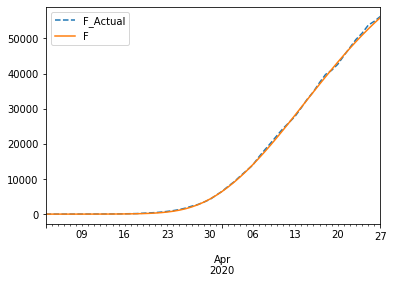

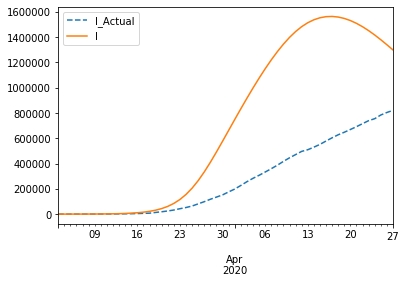

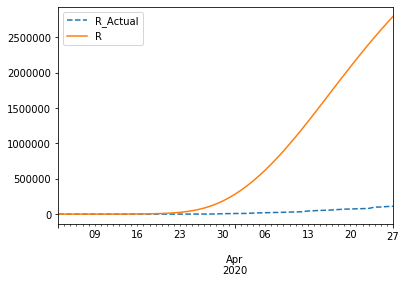

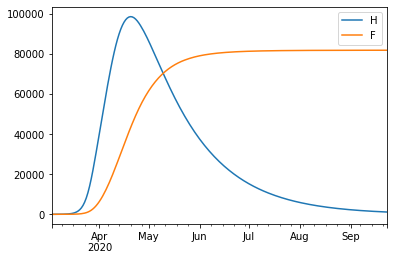

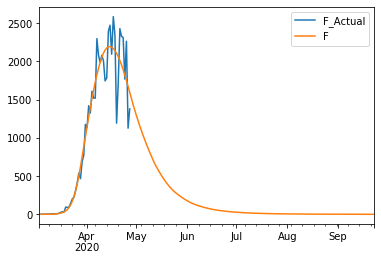

time: 1.2 s


In [267]:
t1.F_fit_plot()
t1.I_fit_plot()
t1.R_fit_plot()
t1.df[['H', 'F']].plot()
t1.df[['F_Actual', 'F']].diff().plot()

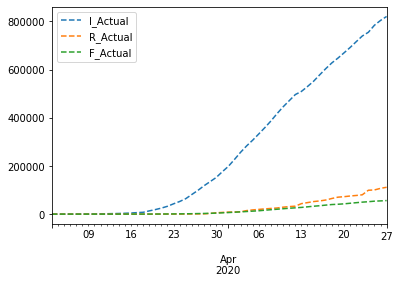

time: 251 ms


In [268]:
t1.actuals_plot()

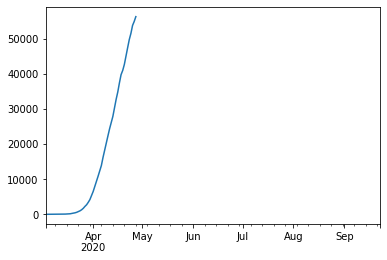

time: 177 ms


In [269]:
t1.df.F_Actual.plot()

MSE: 581.6606888270625


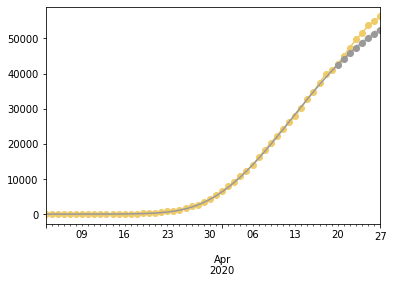

time: 2.67 s


In [270]:
days = 7
t1.outOfSample_forecast(days=days)
seven = t1.forecast.copy()
#t1.params

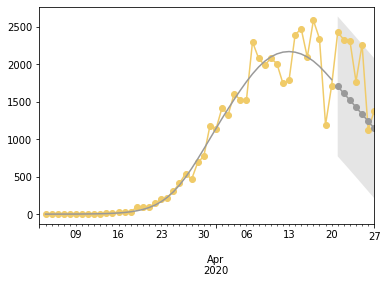

time: 250 ms


In [271]:
t1.outOfSample_plot(days=days, diff=True)

C:\Users\U003477\Documents\Repos\Covid Data\SIR_models.py:1129: RuntimeWarning: overflow encountered in exp
  return (self.model_params['beta1'] -


MSE: 1666.373160031155


{'S0p': 0.0024133706469317505,
 'gamma_i': 0.18731482531837795,
 'gamma_h': 0.03235926833683768,
 'omega': 0.19999999366904828,
 'delta': 0.44531663305129043,
 'lambda': 0.25000001727437526,
 'beta1': 0.4999999594687509,
 'beta2': 0.18329966511349655}

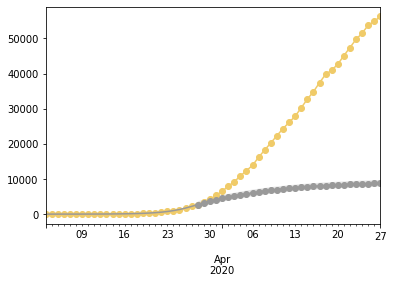

time: 3.27 s


In [276]:
days = 30
t1.outOfSample_forecast(days=days)
t1.params

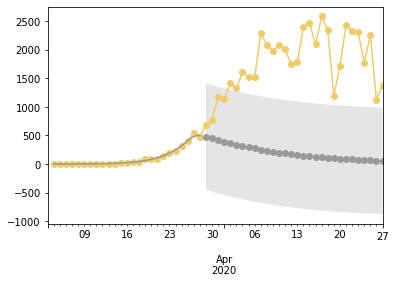

time: 283 ms


In [277]:
t1.outOfSample_plot(days=days, diff=True)

MSE: 1566.9053019178202


{'S0p': 0.00039837763415368605,
 'gamma_i': 0.19427406020422844,
 'gamma_h': 0.057080449470002216,
 'omega': 0.19999998548215067,
 'delta': 0.4787321062860507,
 'lambda': 1.01158035736107,
 'beta1': 0.499676961620002,
 'beta2': 0.24467380533099342}

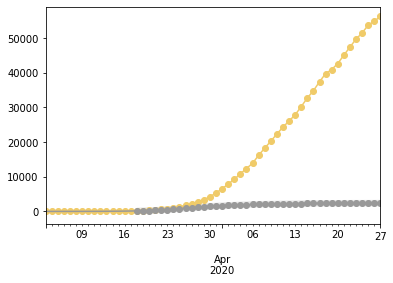

time: 2.13 s


In [278]:
days = 40
t1.outOfSample_forecast(days=days)
forty = t1.forecast.copy()
t1.params

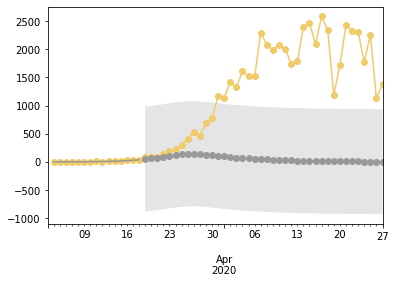

time: 366 ms


In [279]:
t1.outOfSample_plot(days=days, diff=True)

# Brazil

S0p: 0.018470145243747037
gamma_i: 0.07142857142857155
gamma_h: 0.02197802197802198
omega: 0.2
delta: 0.28307317486960615
lambda: 2.924156942743925
beta1: 0.37380261833265105
beta2: 0.1484643659603365
S0: 3925844.8021384156
R0:{'R0_initial': 5.229785584193649, 'R0_final': 2.0771304500998933}
gamma_i: 13.999999999999977 days
gamma_h: 45.5 days
omega: 5.0 days
{'S0p': (0.0001, 0.02), 'gamma_i': (0.07142857142857142, 0.25), 'gamma_h': (0.02197802197802198, 0.05714285714285714), 'omega': (0.047619047619047616, 0.2), 'delta': (0, 0.47878787878787876), 'lambda': (0.25, 4), 'beta1': (0.05, 0.5), 'beta2': (0.05, 0.5)}

I Max:
711674.3095174644
Est:
106751.14642761965
H Max:
55981.166312827314
R Max:
3246569.588499744
F Max:
46917.62625476496
F+R Max:
3293487.214754509


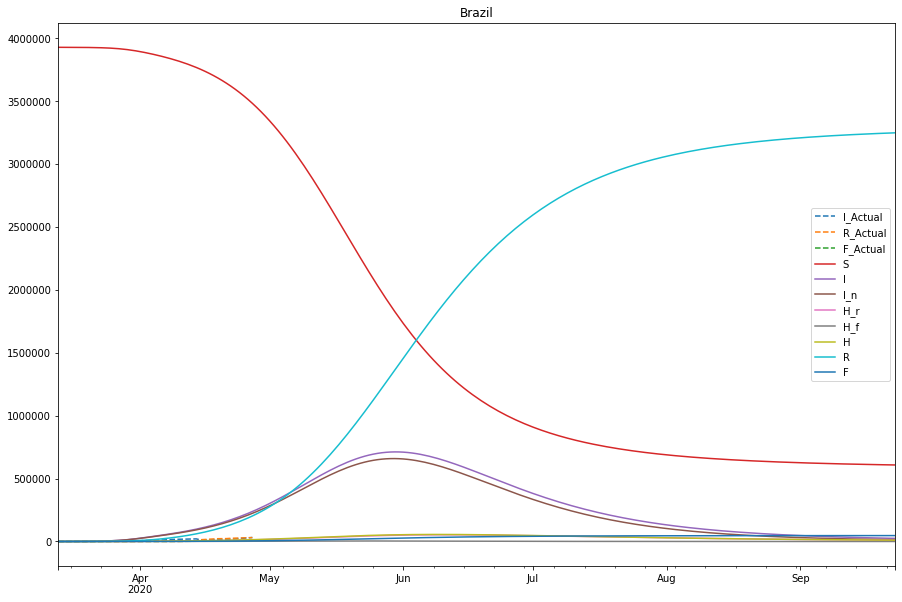

time: 5.72 s


In [25]:
hospRate = 0.05
deltaUpperBound = 79/165

t1 = SIRFH_Sigmoid(country = 'Brazil',
         #quarantineDate = dt.datetime(2020,3,24), #italy lockdown was on the 9th
         hospitalization_rate = hospRate,
         alpha = [.000,.000,.9998],
                   
         # Loose restrictions
         #S0pbounds=(10e6 / 200e6, 10e6 / 200e6),
         #delta_bounds=(0, deltaUpperBound),
         #betaBounds=(0.20, 1.5),
         #gammaBounds=(0.01, .2),
         #gamma_i_bounds=(1/(20), 1/(1)),
         #gamma_h_bounds=(1/(8*7), 1/(2*7)),
         #omega_bounds=(1/(4*7), 1/(3)),
        
         # Tight restrictions
         #S0pbounds=(10e6 / N, 10e6 / N),
         force_parameters = {
             #'S0p': .02,
             #'delta': 79/165,
             #'beta1': 0.31118164052008357,
             #'beta2': .2,
             #'gamma_i': 0.19999999999999982,
             #'gamma_h': 0.023809523809525043,
             #'omega': 0.14199161301361687,
             #'lambda': 0.5,
             
             
         },
                   
         parameter_bounds = {
             'S0p': (.0001, .02),
         #    'delta': (0, deltaUpperBound),
         #    'beta1': (0.20, 1.5),
         #    'beta2': (0.20, 1.5),
             'gamma_i': (1/(14), 1/(4)),
             'gamma_h': (1/(6.5*7), 1/(2.5*7)),
             'omega': (1/(21), 1/(5)),
         #    'lambda': (.5,2)
             
         },
         
         constraints_bounds = {
             'R0': (1,6),
         },
                   
         )

#t1.train_S0()
t1.train()
#t1.train_S0_joint()

#options={'eps': 5e-3, }
#options={'eps': 1e-3, 'ftol': 1e-7}
print(t1.parameter_bounds)

print('\nI Max:')
print(t1.df.I.max())
print('Est:')
print(t1.df.I.max()*.15)
print('H Max:')
print(t1.df['H'].max())
print('R Max:')
print(t1.df['R'].max())
print('F Max:')
print(t1.df['F'].max())
print('F+R Max:')
print(t1.df['F'].max()+t1.df['R'].max())

#t1.outOfSample_forecast(dt.datetime(2020, 4, 1))
t1.main_plot()

S0p: 0.005
gamma_i: 0.12420741936230321
gamma_h: 0.05714285714285697
omega: 0.2
delta: 0.10095809232242667
lambda: 0.25
beta1: 0.4472563606998699
beta2: 0.2940135240972386
S0: 1062638.5822222221
R0:{'R0_initial': 3.6788417166075535, 'R0_final': 2.41836519888321}
gamma_i: 8.051048843411513 days
gamma_h: 17.500000000000053 days
omega: 5.0 days
S0p: 0.01
gamma_i: 0.07142857144127034
gamma_h: 0.02197802197906381
omega: 0.19999999999571272
delta: 0.03874036023553086
lambda: 0.3241448595128195
beta1: 0.4158861374816423
beta2: 0.2970999294597755
S0: 2125435.6672222223
R0:{'R0_initial': 6.00116712818344, 'R0_final': 4.287102093029788}
gamma_i: 13.999999997511015 days
gamma_h: 45.49999999784315 days
omega: 5.000000000107182 days
S0p: 0.015
gamma_i: 0.15422326399377193
gamma_h: 0.05714285714285482
omega: 0.06330165416251599
delta: 0.3040405385454039
lambda: 3.9999999999999925
beta1: 0.5
beta2: 0.16961318517812468
S0: 3188232.7522222223
R0:{'R0_initial': 3.345312454551038, 'R0_final': 1.134818201

True

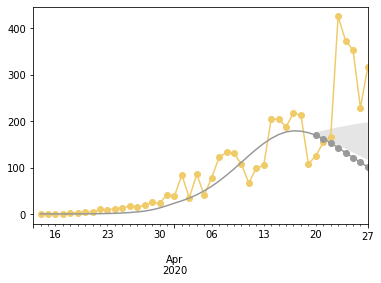

time: 20.1 s


In [26]:
t1.outOfSample_forecast_scenarios(days=7, diff=True)

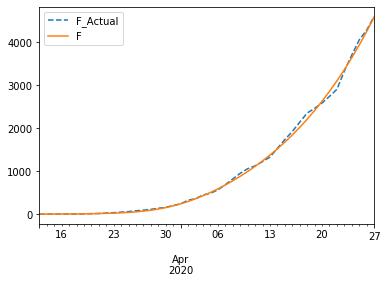

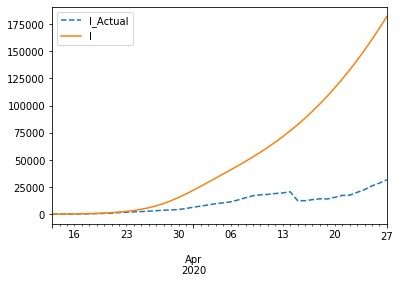

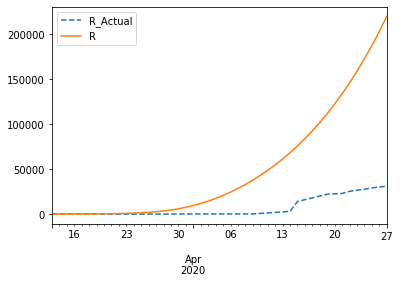

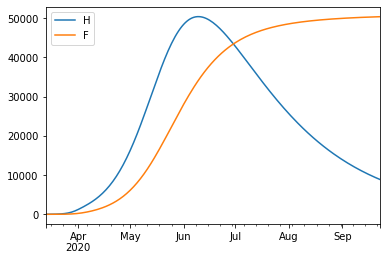

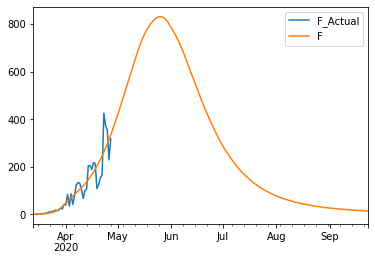

time: 1.6 s


In [15]:
t1.F_fit_plot()
t1.I_fit_plot()
t1.R_fit_plot()
t1.df[['H', 'F']].plot()
t1.df[['F_Actual', 'F']].diff().plot()

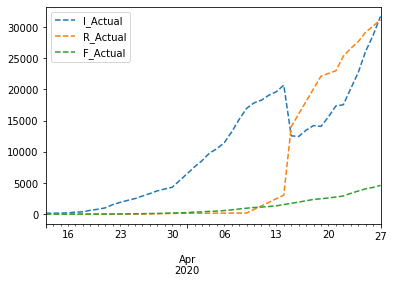

time: 426 ms


In [16]:
t1.actuals_plot()

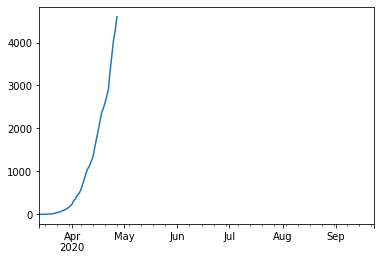

time: 345 ms


In [17]:
t1.df.F_Actual.plot()

MSE: 128.00924462488175


{'S0p': 0.015,
 'gamma_i': 0.16051499953644258,
 'gamma_h': 0.047619047619047616,
 'omega': 0.08333333333333333,
 'delta': 0.26069922268203827,
 'lambda': 4.0,
 'beta1': 0.5,
 'beta2': 0.18222573395018235}

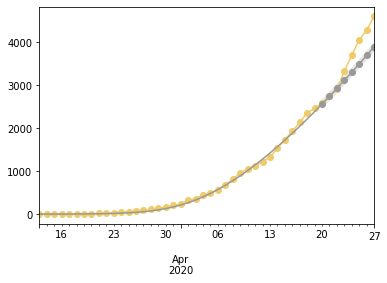

time: 4.33 s


In [18]:
days = 7
t1.outOfSample_forecast(days=days)
seven = t1.forecast.copy()
t1.params

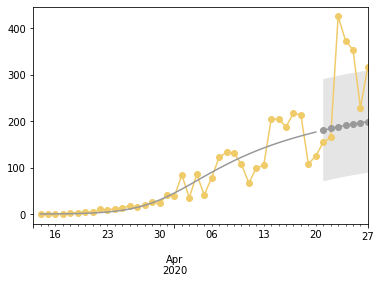

time: 356 ms


In [19]:
t1.outOfSample_plot(days=days, diff=True)

MSE: 121.73859311190517


{'S0p': 0.015,
 'gamma_i': 0.25,
 'gamma_h': 0.047619047619047616,
 'omega': 0.19999999999999943,
 'delta': 0.47878787878787876,
 'lambda': 3.999999999999997,
 'beta1': 0.491252822542691,
 'beta2': 0.24352886002885987}

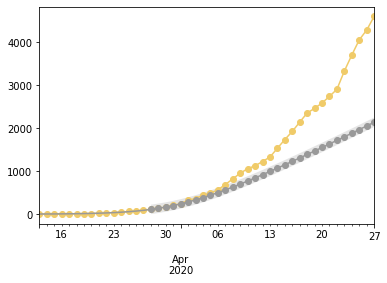

time: 3.93 s


In [20]:
days = 30
t1.outOfSample_forecast(days=days)
t1.params

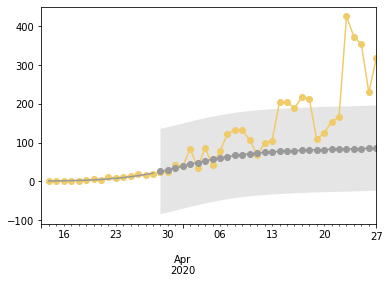

time: 398 ms


In [21]:
t1.outOfSample_plot(days=days, diff=True)

MSE: 547.0620846909636


{'S0p': 0.015,
 'gamma_i': 0.1,
 'gamma_h': 0.023809523809523808,
 'omega': 0.08333333333333333,
 'delta': 0.39233218017783833,
 'lambda': 0.9999980584834935,
 'beta1': 0.5,
 'beta2': 0.20000216417785444}

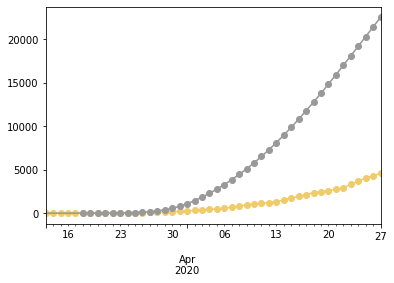

time: 850 ms


In [22]:
days = 40
t1.outOfSample_forecast(days=days)
forty = t1.forecast.copy()
t1.params

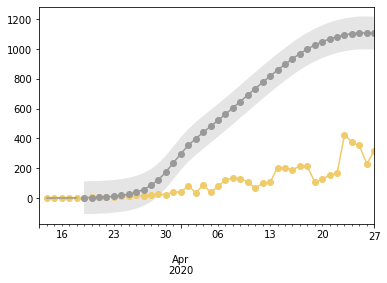

time: 485 ms


In [23]:
t1.outOfSample_plot(days=days, diff=True)

In [ ]:
#bkp final arguments

         #quarantineDate = dt.datetime(2020,3,24), #italy lockdown was on the 9th
         hospitalization_rate = hospRate,
         alpha = [.001,0.001,.998],
                   
         # Loose restrictions
         #S0pbounds=(10e6 / 200e6, 10e6 / 200e6),
         #delta_bounds=(0, deltaUpperBound),
         #betaBounds=(0.20, 1.5),
         #gammaBounds=(0.01, .2),
         #gamma_i_bounds=(1/(20), 1/(1)),
         #gamma_h_bounds=(1/(8*7), 1/(2*7)),
         #omega_bounds=(1/(4*7), 1/(3)),
        
         # Tight restrictions
         #S0pbounds=(10e6 / N, 10e6 / N),
         force_parameters = {
             #'S0p': .05,
             #'delta': 79/165,
             #'beta1': 0.31118164052008357,
             #'beta2': .2,
             #'gamma_i': 0.19999999999999982,
             #'gamma_h': 0.023809523809525043,
             #'omega': 0.14199161301361687,
             #'lambda': 0.5,
             
             
         },
                   
         parameter_bounds = {
             'S0p': (.0001, .02),
         #    'delta': (0, deltaUpperBound),
         #    'beta1': (0.20, 1.5),
         #    'beta2': (0.20, 1.5),
             'gamma_i': (1/(14), 1/(4)),
             'gamma_h': (1/(6*7), 1/(3*7)),
             'omega': (1/(10), 1/(5)),
         #    'lambda': (.5,2)
             
         },
         
         constraints_bounds = {
             'R0': (1,4),
         },

In [11]:

* confidence interval - check how
* scenarios 0.5 - 1.0 - 2.0
* Adjust plot titles - input country name and variables
* create plot tables (4 subplots)

SyntaxError: invalid syntax (<ipython-input-11-d7c2b4461ca9>, line 1)

time: 990 µs
